In [1]:
#Import library
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sys
sys.setrecursionlimit(10000)

In [2]:
#Create procedure to visualize Riemann sum

def visualize(fx):
    f = fx
    a = int(input("Lower limit (a): "))
    b = int(input("Upper limit (b): "))
    N = int(input("Number of partitions (N): "))
    n = 10 # Use n*N+1 points to plot the function smoothly
    wid = (b-a)/N

    x = np.linspace(a,b,N+1)
    y = f(x)

    X = np.linspace(a,b,n*N+1)
    Y = f(X)

    plt.figure(figsize=(15,10))

    # LEFT RIEMANN SUM
    plt.subplot(2,2,1)
    plt.plot(X,Y,'b')
    x_left = x[:-1] # Left endpoints
    y_left = y[:-1]
    plt.plot(x_left,y_left,'b.',markersize=10)
    plt.bar(x_left,y_left,width=wid,alpha=0.2,align='edge',edgecolor='g', color='green')
    plt.title('Left Riemann Sum, N = {}'.format(N))

    # MIDPOINT RIEMANN SUM
    plt.subplot(2,2,2)
    plt.plot(X,Y,'b')
    x_mid = (x[:-1] + x[1:])/2 # Midpoints
    y_mid = f(x_mid)
    plt.plot(x_mid, y_mid,'b.',markersize=10)
    plt.bar(x_mid, y_mid, width=wid, alpha=0.2, edgecolor='g', color='green')
    plt.title('Midpoint Riemann Sum, N = {}'.format(N))

    # RIGHT RIEMANN SUM
    plt.subplot(2,2,3)
    plt.plot(X,Y,'b')
    x_right = x[1:] # Right endpoints
    y_right = y[1:]
    plt.plot(x_right,y_right,'b.',markersize=10)
    plt.bar(x_right, y_right, width=-wid, alpha=0.2, align='edge', edgecolor='g', color='green')
    plt.title('Right Riemann Sum, N = {}'.format(N))
    
    # TRAPEZOID RIEMANN SUM
    plt.subplot(2,2,4)
    plt.plot(X,Y,'b')
    for i in range(N):
        x_tr = [x[i],x[i],x[i+1],x[i+1]]
        y_tr = [0,f(x[i]),f(x[i+1]),0]
        plt.fill(x_tr, y_tr ,'b.', edgecolor='b', alpha=0.2, color='green')
    plt.title('Trapezoidal Rule, N = {}'.format(N))

    plt.show()
    
    # PRINT RESULT
    
    left_result = calculate("left", fx, a, b, N, wid)
    print("Left Riemann sum = " + str(left_result))
    
    mid_result = calculate("mid", fx, a, b, N, wid)
    print("Midpoint Riemann sum = " + str(mid_result))
    
    right_result = calculate("right", fx, a, b, N, wid)
    print("Right Riemann sum = " + str(right_result))
    
    trapezoid_result = calculate("trapezoid", fx, a, b, N, wid)
    print("Trapezoidal rule = " + str(trapezoid_result))

In [3]:
# Create function to calculate Riemann sum using divide and conquer

def calculate(typ, fx, a, b, N, width):
    if (b-a <= width):
        if typ == "left":
            return fx(a) * width
        elif typ == "mid":
            return fx((a+b)/2) * width
        elif typ == "right":
            return fx(b) * width
        elif typ == "trapezoid":
            return (fx(a) + fx(b)) * width * 0.5
    else:
        N_1 = N//2
        N_2 = N - N_1
        
        a_1 = a
        b_1 = a + N_1 * width
        
        a_2 = b_1
        b_2 = b
        
        return calculate(typ, fx, a_1, b_1, N_1, width) + calculate(typ, fx, a_2, b_2, N_2, width)

Lower limit (a): -2
Upper limit (b): 2
Number of partitions (N): 4


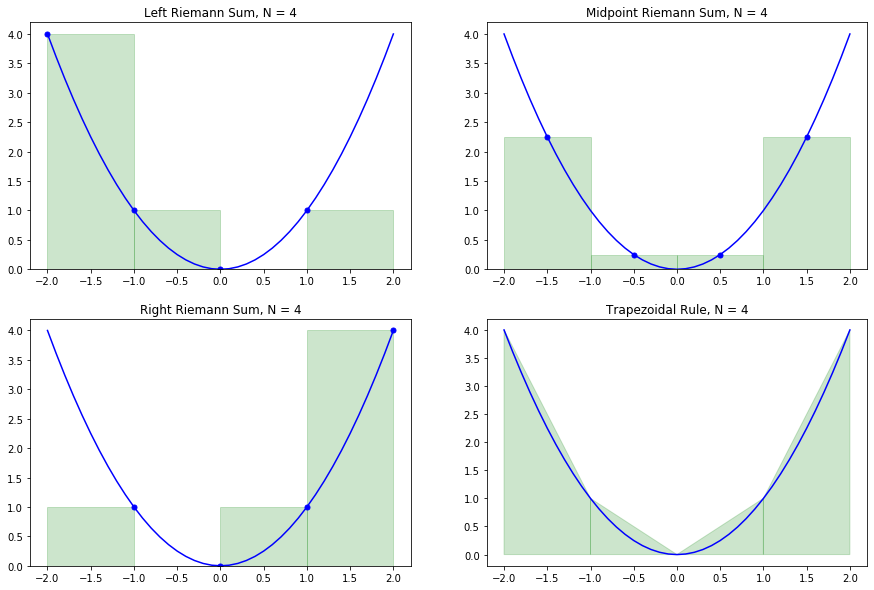

Left Riemann sum = 6.0
Midpoint Riemann sum = 5.0
Right Riemann sum = 6.0
Trapezoidal rule = 6.0


In [4]:
#Test case 1
#f(x) = x**2

function1 = lambda x : x**2
visualize(function1)

In [ ]:
#Test case 2
#f(x) = x**2.5 + 3

function2 = lambda x : x**2.5 + 3 
visualize(function2)

In [ ]:
#Test case 3
#f(x) = x**0.5 - 2

function3 = lambda x : x**0.5 - 2 
visualize(function3)

In [ ]:
#Test case 4
#f(x) = x + 1

function4 = lambda x : x + 1
visualize(function4)